# 李鲁鲁老师的Python课程 第二课

项目主页: https://github.com/LC1332/Learn-Python-with-GPT

- [ ] 条件语句的基础
- [ ] 获取一个frame
- [ ] 判断frame上是否有人脸
- [ ] 根据人脸的位置进行KTV闪烁

#

# 条件语句

因为我们这个课是会随着学期的python课同步展开，或者同学们已经在上一个学期学过Python的课程

这样我们在这套课里面，会更多注重 利用ChatGPT这样的工具进行协同编程

（实际上大多数情况下，同学更多是在输入提示词，而不是程序）

不过作为self-contain的一门课程，我们还是可以讲一些基础

我们在ChatGPT（或者ChatGLM等工具，下同）中输入下面的提示词

```
给我实现一个简易的Python的分支语句的句子，再向我解释分支语句的相关知识
```

## ChatGPT的输出

下面是一个简易的Python分支语句示例：

```python
# 定义一个变量
temperature = 25

# 分支语句
if temperature > 30:
    print("It's a hot day")
elif temperature > 20:
    print("It's a warm day")
else:
    print("It's a cool day")
```

<details>
  <summary>...更多ChatGPT的输出</summary>

### 分支语句的相关知识

分支语句（Branching Statements）是控制程序流程的一种方式，根据条件来决定执行不同的代码块。在Python中，常见的分支语句有`if`、`elif`和`else`。

1. **if语句**：用于判断一个条件是否为真。如果条件为真，则执行相应的代码块。

    ```python
    if 条件:
        执行代码
    ```

2. **elif语句**：表示“否则，如果”的意思，用于检查另一个条件。如果前面的条件不满足，则检查这个条件。如果这个条件为真，则执行相应的代码块。

    ```python
    if 条件1:
        执行代码1
    elif 条件2:
        执行代码2
    ```

3. **else语句**：表示“否则”的意思。当所有前面的条件都不满足时，执行else代码块中的内容。

    ```python
    if 条件1:
        执行代码1
    elif 条件2:
        执行代码2
    else:
        执行代码3
    ```

### 示例解释

在上面的代码中，我们首先定义了一个变量`temperature`，并将其值设置为25。然后我们使用`if`、`elif`和`else`分支语句来判断温度，并根据不同的温度值打印相应的消息。

- 如果`temperature`大于30，则打印“It's a hot day”。
- 如果`temperature`大于20但不超过30，则打印“It's a warm day”。
- 如果`temperature`小于或等于20，则打印“It's a cool day”。

通过分支语句，我们可以根据不同的条件执行不同的代码，从而实现程序的逻辑控制。

</details>

确实已经很详细了，如果没有Python基础的同学，可以继续查看这个里面的描述哈

我们可以尝试在Notebook中运行这段代码

In [1]:
# 定义一个变量
temperature = 25

# 分支语句
if temperature > 30:
    print("It's a hot day")
elif temperature > 20:
    print("It's a warm day")
else:
    print("It's a cool day")


It's a warm day


但是这个例子太无聊了！

我们在这节课上会引入两个函数，一个是`capture_frame()`，一个是`detect_face()`

然后再结合分支语句，来实现一些有趣的应用

让我们先来看capture_frame()函数

## Capture_frame()

我们尝试看一下这个函数的运行效果

当然我们这个课是需要摄像头的，如果没有摄像头的话，很多效果都会减弱

In [5]:
from src.capture_frame import capture_frame

frame = capture_frame()

print(frame.shape)


(480, 640, 3)


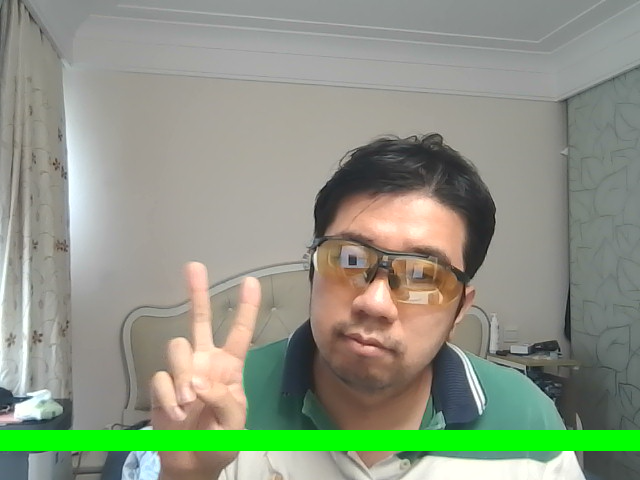

In [4]:
from src.capture_frame import display_frame_in_notebook

display_frame_in_notebook(frame)

frame = capture_frame() 可以获取摄像头的一张照片

（注意弹出的窗口） ，当然如果你觉得拍照的进度条时间太长了，可以调整中间的参数

然后我们还实现了一个display_frame_in_notebook(frame)这个函数

方便我们在notebook里面看到这个照片。

这里注意到我们从src文件夹下的capture_frame.py里面，引入了这两个函数

```python
from src.capture_frame import capture_frame
from src.capture_frame import display_frame_in_notebook
```

这使得我们可以把一个函数封装到一个文件里面，通过import额外引入

这两个函数是老师为了讲课方便，提前实现的，并且这两个函数，其实也是由ChatGPT去辅助编写的

我们后面马上会有一节课程，教同学们先编写这样的函数，再编写更完整的程序

不过在这节课里，我们先仅仅关注于这些函数的调用

我们马上再引入一个函数 detect_one_face( frame )

## detect_one_face( frame )

In [6]:
from src.detect_face import detect_one_face

x, y = detect_one_face(frame)

print(x, y)

360 261


这里我们实现了一个方便的函数，只检测画面中最大的人脸，并且返回人脸中心点的坐标

如果画面中没有人脸，就返回-1，-1

## 凑在一起

我们可以把前面这些代码凑在一起

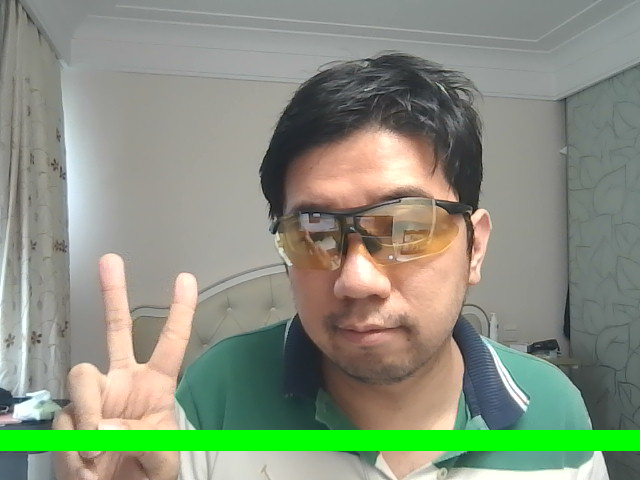

363 268


In [8]:
from src.capture_frame import capture_frame, display_frame_in_notebook
from src.detect_face import detect_one_face

frame = capture_frame(5)

display_frame_in_notebook(frame)

x, y = detect_one_face(frame)

print(x, y)

显然这是可以工作的-o-~

这里我们想复现我们之前设计的一个经典案例，用摄像头来检测人脸坐标

如果画面里有人脸，我们就把画面整体渲染成红色

In [10]:
print(frame.shape)
print(frame.shape[1])

(480, 640, 3)
640


## 附录: capture_frame函数

这节课中会引入capture_frame()函数，这个函数我们希望完全用ChatGPT来编写，具体的prompt是这样的

```
我希望实现一个capture_frame() 函数


这个函数会打开一个摄像头，在摄像头上显示左右镜像过的画面

同时，在frame上回渲染一个进度条，进度条随着时间会从左到右运行，总共10秒

10秒后会记录frame，release掉camera对象，并且return记录下来的frame
```

## 附录: display_frame_in_notebook( frame )函数

```
为我实现一个display_frame_in_notebook( frame )函数

接受一个opencv camera获取到的frame，展示到notebook中
```

## 附录: detect_one_face( frame )函数

```
我希望实现一个detect_one_face( frame )函数

利用opencv对frame中的人脸进行检测，对于最大的人脸，返回人脸的中心坐标x, y

如果没有人脸，返回-1, -1
```

## 附录：frame = mask(frame, color_name, left_x, left_y)

```
我希望实现一个frame = mask(frame, color_name, left_x, left_y)函数

```